In [3]:
import matplotlib.pyplot as plt
import numpy as np
import cv2

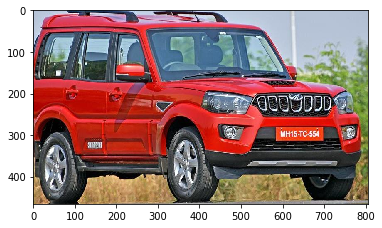

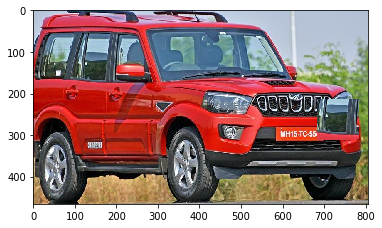

In [34]:
img = cv2.imread('images/0.jpeg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.show()

img = randomCropAdd(img, (100,100))
plt.imshow(img)
plt.show()